In [99]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import statistics
from scipy.stats import skew
import scipy.stats as sts
from scipy.stats import moment

## Задача 1 (б)

In [100]:
my_rand = random.sample(range(0,197),100)
x = []
y1, y2, y3, y4, y5 = [], [], [], [], []

In [101]:
t1 = [2*np.mean(my_rand[:n]) for n in range (1,101)]
t2 = [(n+1)*np.min(my_rand[:n]) for n in range(1,101)]
t3 = [((n+1)*(np.max(my_rand[:n])))/n for n in range(1,101)]
t4 = [(np.min(my_rand[:n]) + np.max(my_rand[:n])) for n in range(1,101)]
t5 = [(my_rand[:n][0]+((np.sum(my_rand[1:n]))/n-1)) for n in range (2,102)]

In [102]:
my_rand = random.sample(range(0,197),100)
x = [i for i in range(1,101)]
y1 = [abs(i - 197) for i in t1]
y2 = [abs(i - 197) for i in t2]
y3 = [abs(i - 197) for i in t3]
y4 = [abs(i - 197) for i in t4]
y5 = [abs(i - 197) for i in t5]

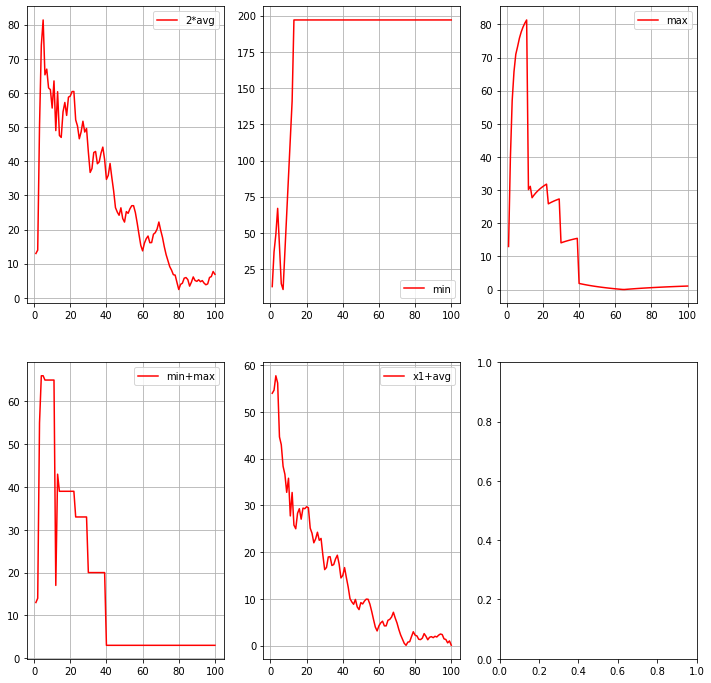

In [103]:
fig, ax = plt.subplots(2,3, figsize = (12,12))
ax[0,0].plot(x,y1,color = 'r', label = '2*avg')
ax[0,0].legend()
ax[0,0].grid(True)
ax[0,1].plot(x,y2,color = 'r', label = 'min')
ax[0,1].legend()
ax[0,1].grid(True)
ax[0,2].plot(x,y3,color = 'r', label = 'max')
ax[0,2].legend()
ax[0,2].grid(True)
ax[1,0].plot(x,y4,color = 'r', label = 'min+max')
ax[1,0].legend()
ax[1,0].grid(True)
ax[1,1].plot(x,y5,color = 'r', label = 'x1+avg')
ax[1,1].legend()
ax[1,1].grid(True)

## Задача 2

In [118]:
N = 25
my_rand = np.array([np.random.exponential(1) for i in range(N)])

In [119]:
my_rand

array([0.51784319, 0.02572876, 0.4413549 , 3.55174193, 1.53032761,
       0.79337612, 0.64963222, 0.84131692, 1.09748379, 0.41906761,
       0.24868487, 0.98721388, 0.67830501, 0.03105512, 0.48934758,
       0.01253092, 2.52262106, 1.89399656, 0.80134586, 1.16873333,
       0.40237051, 1.3035773 , 2.20227111, 0.25221444, 1.56802027])

### Поиск моды, медианы и тд

In [106]:
mode = statistics.mode(my_rand)
median = statistics.median(my_rand)
scope = np.max(my_rand) - np.min(my_rand)
sk = skew(my_rand)

In [107]:
print ('Мода = ', mode)
print('Медиана = ',median)
print('Размах = ',scope)
print('Коэфф асимметрии = ',sk)

Мода =  0.9249732033181788
Медиана =  0.6997520662073277
Размах =  3.4047041905652473
Коэфф асимметрии =  1.1282660039581063


### Эмпирическая функция распределения, гистограмма, boxplot

Text(0.5, 1.0, 'Эмпирическая функция распределения')

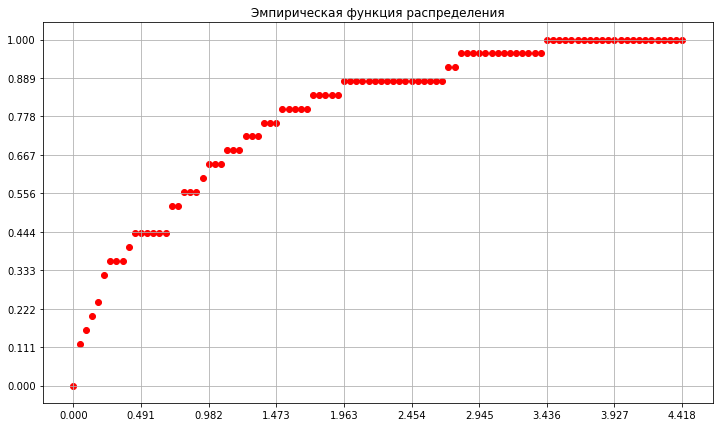

In [108]:
x = np.linspace(0, np.max(my_rand) + 1, 100)
y = np.array([np.sum(my_rand<i) for i in x]) / 25
fig, ax = plt.subplots(figsize=(12,7))
ax.grid(True)
ax.set_xticks(np.linspace(0, np.max(x), 10))
ax.set_yticks(np.linspace(0, np.max(y), 10))
plt.scatter(x,y, color = 'r')
ax.set_title('Эмпирическая функция распределения')

Text(0.5, 1.0, 'Гистограмма')

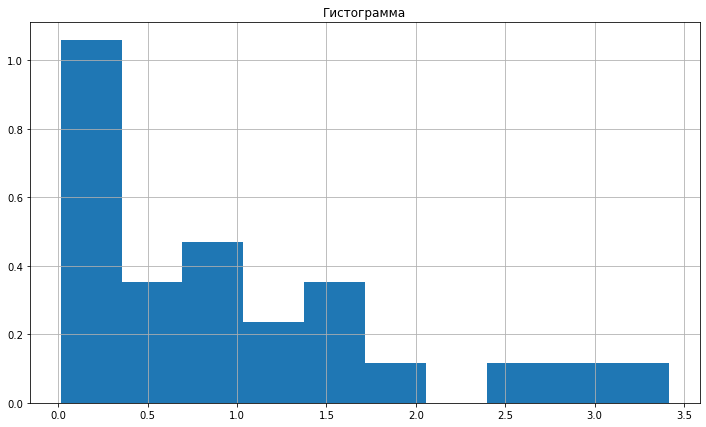

In [109]:
fig, ax = plt.subplots(figsize=(12,7))
ax.hist(my_rand, bins = 10, density = True)
ax.grid(True)
ax.set_title('Гистограмма')

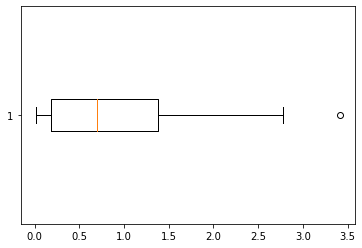

In [110]:
bp = plt.boxplot(my_rand, vert = 0)


## Ядерная оценка

In [111]:
s = math.sqrt((1/24)*np.sum((my_rand - np.mean(my_rand))**2))

In [112]:
s

0.9533141308876159

In [113]:
h = 2.344*s/(25**0.2)
h

1.1738311661351186

In [120]:
x_s= np.array(sorted(my_rand))
x_s

array([0.01253092, 0.02572876, 0.03105512, 0.24868487, 0.25221444,
       0.40237051, 0.41906761, 0.4413549 , 0.48934758, 0.51784319,
       0.64963222, 0.67830501, 0.79337612, 0.80134586, 0.84131692,
       0.98721388, 1.09748379, 1.16873333, 1.3035773 , 1.53032761,
       1.56802027, 1.89399656, 2.20227111, 2.52262106, 3.55174193])

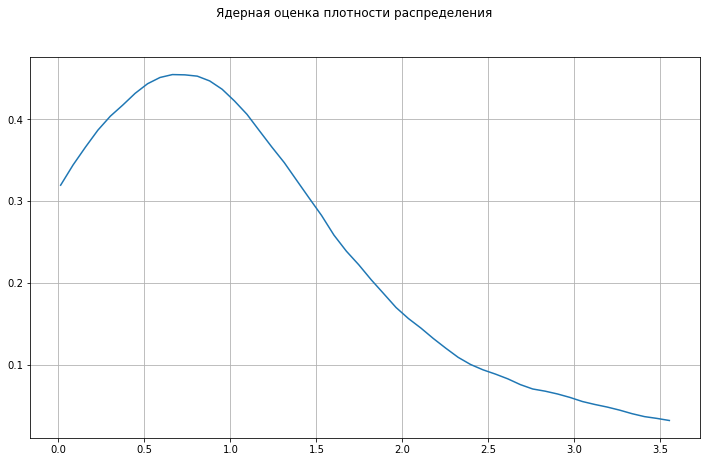

In [123]:
def q(y):
    return 0.75*(1 - y**2)

def nuc_est(z):
    return 1/h/25 * sum([(q((z - i)/h) if q((z - i)/h) > 0 else 0) for i in x_s])


fig, ax = plt.subplots(1, figsize = (12, 7))
ax.grid(True)
fig.suptitle("Ядерная оценка плотности распределения")
plt.plot(np.linspace(x_s[0], x_s[-1], 50), [nuc_est(i) for i in np.linspace(x[0], x_s[-1], 50)])

### Сравнение bootsrap и плотности распределения среднего арифметического

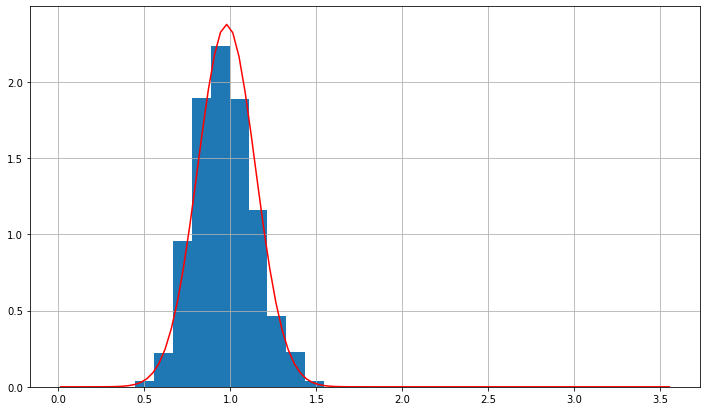

In [126]:
def gaus(x): 
    return 1/np.sqrt(2*np.pi*moment(x_s, 2)/25)*np.exp(-(x - x_s.mean())**2 / 2 / moment(x_s, 2)*25)

bootstrap = [np.mean(np.random.choice(x_s, len(x_s))) for i in range(1000)]

x_s_n = list(np.histogram(bootstrap))

x_s_n[0] = x_s_n[0] / len(bootstrap)
x_s_n[0] = [x_s_n[0][i] / (x_s_n[1][i+1] - x_s_n[1][i]) for i in range(len(x_s_n[0]))]

fig, ax = plt.subplots(figsize = (12, 7))
gaus_d = list(map(gaus, np.linspace(x_s[0], x_s[-1], 100)))

plt.plot(np.linspace(x_s[0], x_s[-1], 100), gaus_d, color = 'r')
plt.hist(x_s_n[1][:-1], x_s_n[1], weights = x_s_n[0])
ax.grid(True)

## Коэффициент асимметрии

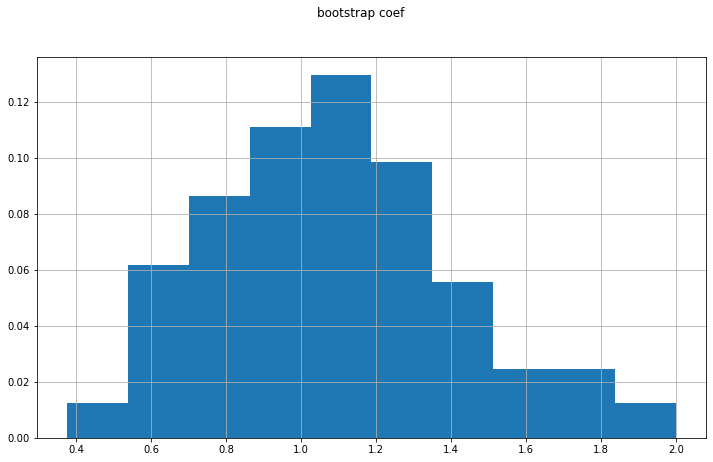

In [117]:
def coef(data):
    return moment(data, 3) / np.power(moment(data, 2), 1.5)

bootstrap_2 = [coef(np.random.choice(x_s, len(x_s))) for i in range(100)]
x_s_n = list(np.histogram(bootstrap_2))
x_s_n[0] = x_s_n[0] / len(bootstrap)
x_s_n[0] = [x_s_n[0][i] / (x_s_n[1][i+1] - x_s_n[1][i]) for i in range(len(x_s_n[0]))]

fig, ax = plt.subplots(figsize = (12, 7))
fig.suptitle("bootstrap coef")

plt.hist(x_s_n[1][:-1], x_s_n[1], weights=x_s_n[0])
ax.grid(True)
